# 8/23 pandas處理str

In [ ]:
import pandas as pd

In [ ]:
# 8/14 read open date
f= open("成績單.txt") 
list_all=f.readlines()
# print(list_all) #['01\t楊佳錩\t76\t80\t45\tA\t82-5-14\n'

# score = []
# for it in list_all:
#     a = it.split('\t')  
#     score.append(a)
score = [ it.split('\t') for it in list_all ]
df= pd.DataFrame(score) #2d pd.DF 大小寫!!

# df.dtypes #col index dtypes 1d series 似dict key 文字索引資料
# type(df.dtypes)

df.columns=['no','name','ch','eng','math','bt','birth'] #add col
df= df.astype({'ch': 'uint64','eng': 'uint64','math': 'uint64'}) #回存df.astype 
#'uint8' 可能太摳0-255 包括數字運算時不可超過255

# df.loc[:,'birth'] # df.loc[R,C]
df['avg']= round((df['ch']+df['math']+df['eng'])/ 3,2)       #此為python BIF round()
# df['avg']= ((df['ch']+df['math']+df['eng'])/3).round(2)   #此為pd.series.round()
# type(df['avg']) #pandas.core.series.Series

#series.rank( 平手method='min' 
df['rank'] = df['avg'].rank(method='min',ascending=False).astype('int64')
df.sort_values('rank')

df.info()
df

In [ ]:
# #Series.str.strip
# df['birth']=df['birth'].str.strip()

# for n in range(29):
#     y,m,d =df.loc[n,'birth'].split('-')  # df.loc[n,'birth'] ->scalar str
#     y=str(int(y)+1911)
#     df.loc[n,'birth']=f'{y}-{m}-{d}'        #注意每次都會重複運算

In [ ]:
# Series.apply func
import pandas as pd
def 西元(x):
    y,m,d = x.strip().split('-')
    y = int(y)+1911                     #注意每次都會重複運算
    return f'{y}-{m}-{d}' 
df['birth'] = df['birth'].apply(西元)

# pd.to_datetime('1989-12-13') #Timestamp datetime64[ns]
df['birth']= pd.to_datetime(df['birth']) 
df['生日年'] = df['birth'].dt.year        
df['生日月'] = df['birth'].dt.month
df['生日日'] = df['birth'].dt.day
df

In [ ]:
#時間格式  series.dt.year
def 年齡(x):    
    """ x.year instead of x.dt.year
    Extract the Timestamp as series 
    apply method is used to apply a function to each element in a Series
    """
    y = x.year  #seris
    m = x.month
    d = x.day
  
    yn =pd.Timestamp.now().year
    mn =pd.Timestamp.now().month
    dn =pd.Timestamp.now().day
  
    age = yn - y
    if m > mn | (m==mn and d>dn):
        age-=1
    return age
df['age'] = df['birth'].apply(年齡)
df.info()
df

In [ ]:
df.groupby(['bt']).count()

In [ ]:
df1 = df.groupby(['bt']).count()

import matplotlib.pyplot as plt
plt.rc('font', family='Microsoft JhengHei') #中文

類別=df1.index
人數 = df1['no']
plt.bar(類別, 人數 , color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('年齡')
plt.ylabel('人數')
plt.title('stats')
plt.show()

# 8/26

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
>>> d = {'col1': [1, 2], 'col2': [3, 4]}
>>> df = pd.DataFrame(data=d)
>>> df.index

## Add 1d pd.Series 網路不一定正確

In [ ]:
import pandas as pd
countries = pd.Series(['Taiwan','Japan','Korea'],index=[1,2,3])
# Add one series
countries[5] = 'USA' #like dict
print(countries)

In [ ]:
import pandas as pd
countries = pd.Series(['Taiwan','Japan','Korea'],index=[1,2,3])
New = pd.Series(['USA','Canada','UK'],index=[1,2,3])
# Solution2 - concat
New_countries = pd.concat([countries,New],ignore_index=True)
print(New_countries)

In [ ]:
import pandas as pd
data = {'name':['Alan','Chris','Dora'],
        'city':['Taipei','Tainan','Yilan'],
        'math':[76,92,63]}
df = pd.DataFrame(data,index=[1,2,3])
# Solution1 - loc
df.loc[5] = ['Elsa','Taichung',88]      #動態新增
print(df)

In [ ]:
import pandas as pd
data = {'name':['Alan','Chris','Dora'],
        'city':['Taipei','Tainan','Yilan'],
        'math':[76,92,63]}
df = pd.DataFrame(data,index=[1,2,3])
# Add two columns : chinese、english
data2 = {'chinese':[88,75,90],'english':[82,92,82]}
df2 = pd.DataFrame(data2,index=[1,2,3])
new = pd.concat([df,df2],axis=1)  #pd.concat 索引 左右合併
print(new) 

In [ ]:
new.loc[:,['city','name']]  #重拿代替刪除

## pd.read_csv

In [ ]:
#detect the encoding:
import chardet
# Read the file in binary mode to detect encoding
with open('新竹市重要遊憩據點遊客人次統計.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))  # Read the first 10000 bytes to guess the encoding
print(result) #{'encoding': 'Big5', 'confidence': 0.99, 'language': 'Chinese'}

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('新竹市重要遊憩據點遊客人次統計.csv',encoding='Big5',sep='\t')
df= df.drop(columns=['Countycode','YYYMM'])

df = df.astype('int32') #2^32 
df['民國年月'] = df['民國年月'].astype('str') #pandas.Series.astype
df= df.set_index(['民國年月'] )

import matplotlib.pyplot as plt
# Set font for Chinese characters
plt.rc('font', family='Microsoft JhengHei')

# Extract data for the plot
據點 = df.columns #index 物件
人數 = df.loc['10801',:]


plt.figure(figsize=(10, 5))  # Increase figure size to give more space for labels
colors = plt.cm.Set2(np.linspace(0, 1, len(據點)))  # Use a colormap for colors
# colors  = matplotlib.colormaps['viridis'].resampled(8)

plt.bar(據點, 人數, color=colors)
plt.xlabel('據點', fontsize=20)
plt.ylabel('人數',rotation=0, ha='right',fontsize=20)
plt.title('統計數據',fontsize=24)

# Modify the X-axis tick labels to remove the last two characters
modified_labels = [n[:-2] for n in 據點]
plt.xticks(ticks=range(len(據點)), labels=modified_labels, rotation=20, ha='center', fontsize=12)

plt.show()

In [ ]:
排序

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('新竹市重要遊憩據點遊客人次統計.csv',encoding='Big5',sep='\t')
df = df.drop(columns=['Countycode','YYYMM'])
df = df.astype('int32')
df['民國年月'] = df['民國年月'].astype('str')
df['年'] =  df['民國年月'].str[:3]
df = df.set_index('民國年月')

# s1 = df.loc['10801'].sort_values(ascending=False) # 108年1月人數 ( 有排序 )
# s1 = df.groupby("年").sum().loc['108'].sort_values(ascending=False) # 108年總人數 ( 有排序 )
s1 = df.sum(numeric_only=True).sort_values(ascending=False) #108年-112年五年總人數 ( 有排序 )

print(s1.max())

# groupby 測試如下三例
# for n,df in df.groupby("年"):
#     print(n)
#     print(df)
#     print()

# df_group = df.groupby("年").sum()

# df_108 = df.groupby("年").get_group("108")

import matplotlib as mpl
mpl.rc('font', family='Microsoft JhengHei')

#Oranges = mpl.colormaps['Oranges'].resampled(8)
Accent = mpl.colormaps['Accent']
new_Accent = [Accent(n) for n in range(8)]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(10, 5))
fig.suptitle('108年-112年 新竹市重要遊憩據點遊客人次統計',color='red',fontsize=20)

據點 = s1.index
據點 = [item[:-2] for item in 據點]
據點索引 = [n for n in range(len(據點))]
人數 = s1
rects = ax.bar(據點 , 人數, color=new_Accent, zorder=10)
ax.bar_label(rects, padding=3, color='red')
ax.set_xlabel('據點',color='red',fontsize=20)
ax.set_ylabel('人數(百萬)',color='red',fontsize=20)
#ax.set_ylabel('人數',color='red',fontsize=20)
ax.set_xticks(據點索引,據點,color='red',rotation=20)
ax.set_yticks([n for n in range(0,20000001,5000000)],
              [str(n) for n in range(0,21,5) ],color='red')
plt.grid(visible=True, axis='y')
plt.show()

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('新竹市重要遊憩據點遊客人次統計.csv',encoding='Big5',sep='\t'
                 )
df = df.drop(columns=['Countycode','YYYMM'])
df = df.astype('int32')
df['民國年月'] = df['民國年月'].astype('str')
df['年'] =  df['民國年月'].str[:3]
df = df.set_index('民國年月')
s1 = df.groupby("年").sum().loc['108'].sort_values(ascending=False) # 108年總人數 ( 有排序 )

import matplotlib as mpl
mpl.rc('font', family='Microsoft JhengHei')

#Oranges = mpl.colormaps['Oranges'].resampled(8)
Accent = mpl.colormaps['Accent']
new_Accent = [Accent(n) for n in range(8)]

import matplotlib.pyplot as plt
import squarify # pip install squarify (algorithm for treemap)
plt.title('108年 新竹市重要遊憩據點遊客人數分布圖')
據點 = s1.index
#據點 = [item[:-2] for item in 據點]
據點 = ['新竹漁港', '城隍廟', '十八尖山', '青青草原', '新竹公園', '賞蟹步道', '十七公里\n自行車道', '青草湖']
人數 = s1
squarify.plot(sizes=人數, label=據點, color=new_Accent, alpha=0.5 )
plt.axis('off')
plt.show()

## 逐行慢慢改

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('新竹市重要遊憩據點遊客人次統計.csv',encoding='Big5',sep='\t')
df= df.drop(columns=['Countycode','YYYMM'])

df = df.astype('int32') #2^32 
df['民國年月'] = df['民國年月'].astype('str') #pandas.Series.astype
df= df.set_index(['民國年月'] )

df= df.loc[ '10801':'10812', ['十八尖山人次','青青草原人次','城隍廟人次'] ]


import matplotlib.pyplot as plt
plt.rc('font', family='Microsoft JhengHei')

# Data
barWidth = 0.25
bars1 = df.loc[ : , '十八尖山人次' ] 
bars2 = df.loc[ : , '青青草原人次' ] 
bars3 = df.loc[ : , '城隍廟人次' ] 

# Bar positions
r = np.arange(len(bars1))  #array([ 0,  1,  2...])
r2 = r + barWidth           #array([ 0.25,  1.25,  2.25,  3.25
r3 = r2 + barWidth

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(12, 5))
fig.suptitle('108年1-12月新竹市重要遊憩據點遊客人次統計',color='black',fontsize=20)

ax.bar(r, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='十八尖山人次')
ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='青青草原人次')
ax.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='城隍廟人次')

# Xticks
ax.set_xlabel('月份', fontsize=20)
ax.set_xticks(r + barWidth,  [f'{i}月' for i in range(1, 13)]  )  # X-ticks位置小標右移至第2條
# Axes.set_xticks( labels=None, *, ) labels:list of str  ['1月', '2月',

# Format y-ticks with thousands separators
def format_y_ticks(value, tick_number):
    return f'{int(value):,}'
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(format_y_ticks))

ax.set_ylabel('人數', fontsize=18, labelpad=10)


# # Legend and show
ax.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Your data loading and preprocessing code
df = pd.read_csv('新竹市重要遊憩據點遊客人次統計.csv', encoding='Big5', sep='\t')
df = df.drop(columns=['Countycode', 'YYYMM'])
df = df.astype('int32')
df['民國年月'] = df['民國年月'].astype('str')
df = df.set_index('民國年月')
df = df.loc['10801':'10812', ['十八尖山人次', '城隍廟人次', '新竹漁港人次']]

# Plotting
mpl.rc('font', family='Microsoft JhengHei')

fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(12, 5))
fig.suptitle('108年1-12月新竹市重要遊憩據點遊客人次統計', color='black', fontsize=20)

barWidth = 0.8
bars1 = df['十八尖山人次']
bars2 = df['城隍廟人次']
bars3 = df['新竹漁港人次']

# Bar positions
r = np.arange(len(bars1))

# Plot bars
ax.bar(r, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='十八尖山', zorder=3)
ax.bar(r, bars2, bottom=bars1, color='#557f2d', width=barWidth, edgecolor='white', label='城隍廟', zorder=3)
ax.bar(r, bars3, bottom=bars1 + bars2, color='#2d7f5e', width=barWidth, edgecolor='white', label='新竹漁港', zorder=3)

# Adding annotations
for i in range(len(r)):
    total = bars1.iloc[i] + bars2.iloc[i] + bars3.iloc[i]
    ax.text(r[i], total + 7000, str(total), ha='center', color='black', fontsize=10, zorder=4)

# Grid settings zorder:draw order
ax.grid(visible=True, which='major', axis='y', zorder=0)

# Formatting
月份 = [f'{n}月' for n in range(1, 13)]
ax.set_xlabel('月份', color='black', fontsize=20)
ax.set_ylabel('人數(千)', color='black', fontsize=20)
ax.set_xticks(r)
ax.set_xticklabels(月份, color='black', rotation=20)
ax.set_yticks([n for n in range(0, 900001, 50000)], [str(n) for n in range(0, 901, 50)], color='black')
ax.legend(loc='upper left', ncol=3)  # Legend
plt.show()


# fetching

In [ ]:
# 此程式的日期列索引已經轉到欄位去了  而且日期變成了字串格式
import yfinance as yfin
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker symbol and date range
ticker = 'GC=F'#黃金
start_date = '2024-06-01'
end_date = '2024-08-22'

# Fetch data using yfinance
# df = yfin.download(ticker, start=start_date, end=end_date)
df = yfin.download(ticker, period='6mo')

# Reset index and convert index to string
df.index = df.index.astype(str)
df = df.reset_index()
df.info()

# Extract Date and Close columns
日期 = df['Date']
收盤價 = df['Close']

# Import Matplotlib
import matplotlib
from matplotlib.font_manager import fontManager

# Add custom font and set Matplotlib settings
plt.rc('font', family='Microsoft JhengHei')

# Create a figure and axes
_fig = plt.gcf()
_axes = plt.gca()

# Set figure and axes properties
_fig.set_facecolor((255/255, 219/255, 172/255))
_fig.set_figheight(7)
_fig.set_figwidth(14)
_fig.set_layout_engine(layout='tight')
_axes.set_facecolor((241/255, 194/255, 125/255))

# Set x-ticks and labels
_xticks = [n for n in range(0, len(日期), 10)]
_labels = [日期[n][5:] for n in _xticks]

# Plot the data
plt.title("黃金股價折線圖", fontsize=18)
plt.plot(日期, 收盤價, color=(0, 0, 1), linewidth=2.0, marker='o', markerfacecolor=(1, 0, 0))
plt.xticks(ticks=_xticks, labels=_labels, rotation=20)
plt.xlabel("日期", fontsize=12, rotation=0)
plt.ylabel("收盤價(美元)", fontsize=12)
plt.grid(visible=True, axis='y', linestyle='--')
plt.show()


# 8/28 fetch

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv(r'.\738\STOCK_DAY_00738U_202001.csv', encoding='Big5',header=1,
                thousands=',')
#  Regex pattern for dates in the format 'ccc/cc/cc' #df[c可為條件,logic]
df = df[ df['日期'].str.match(r'^\d{3}/\d{2}/\d{2}$') ]  
    # df['日期'].str.match(r'\d{3}/\d{2}/\d{2}') #bool index True False

# Drop the last column (assumed to be 'Unnamed: 9')
df = df.drop(columns= ['Unnamed: 9','成交金額','漲跌價差','成交筆數'] )

#uint32 cannot handle commas
# df['成交股數'] = df['成交股數'].str.replace(',', '', regex=False)
df['成交股數'] = df['成交股數'].astype('uint32')

df.info()
df

In [ ]:
df1 = pd.read_csv(r'.\738\STOCK_DAY_00738U_202001.csv', encoding='Big5',header=1, thousands=',')
df1 = df1[ df1['日期'].str.match(r'^\d{3}/\d{2}/\d{2}$') ]  
df1 = df1.drop(columns= ['Unnamed: 9','成交金額','漲跌價差','成交筆數'] )
df1['成交股數'] = df1['成交股數'].astype('uint32')

df2 = pd.read_csv(r'.\738\STOCK_DAY_00738U_202002.csv', encoding='Big5',header=1, thousands=',')
df2 = df2[ df2['日期'].str.match(r'^\d{3}/\d{2}/\d{2}$') ]  
df2 = df2.drop(columns= ['Unnamed: 9','成交金額','漲跌價差','成交筆數'] )
df2['成交股數'] = df2['成交股數'].astype('uint32')


df = pd.concat([df1,df2] )
df = df.reset_index(drop=True)
df

In [103]:
import pandas as pd
import os

# Initialize an empty list to collect DataFrames
df_list = [] 

# Loop through each year
for year in range(2020, 2025):
    # Loop through each month of the year
    for month in range(1, 13):
          
        #fstr  \\->\ {arg}
        file_path = f'.\\738\\STOCK_DAY_00738U_{year}{month:02d}.csv'
        
        # Check if the file exists
        if os.path.exists(file_path):
            # Read the CSV file
            df = pd.read_csv(file_path, encoding='Big5', header=1, thousands=',')
            
            # Filter rows and process the DataFrame
            df = df[df['日期'].str.match(r'^\d{3}/\d{2}/\d{2}$')]
            df = df.drop(columns=['Unnamed: 9', '成交金額', '漲跌價差', '成交筆數'])
            df['成交股數'] = df['成交股數'].astype('uint32')
            
            # Append to the list of DataFrames
            df_list.append(df)
        else:
            print(f"File not found: {file_path}")

# Concatenate all DataFrames
df_all = pd.concat(df_list, ignore_index=True)

# Reset index of the concatenated DataFrame
df_all = df_all.reset_index(drop=True)

# print(df_all)
df_all.head(10)

File not found: .\738\STOCK_DAY_00738U_202409.csv
File not found: .\738\STOCK_DAY_00738U_202410.csv
File not found: .\738\STOCK_DAY_00738U_202411.csv
File not found: .\738\STOCK_DAY_00738U_202412.csv


,日期,成交股數,開盤價,最高價,最低價,收盤價
0,109/01/02,1675000,20.10,20.13,20.02,20.08
1,109/01/03,1996001,20.25,20.45,20.25,20.45
2,109/01/06,3787000,20.47,20.80,20.47,20.74
3,109/01/07,2182000,20.39,20.39,20.17,20.26
4,109/01/08,5131012,20.88,21.15,20.72,20.80
5,109/01/09,1588500,20.39,20.41,20.23,20.29
6,109/01/10,1079000,20.09,20.09,20.01,20.03
7,109/01/13,940000,20.23,20.25,20.17,20.18
8,109/01/14,2005000,20.02,20.02,19.85,19.88
9,109/01/15,1086000,19.93,20.04,19.89,20.04


File not found: .\738\STOCK_DAY_00738U_202409.csv
File not found: .\738\STOCK_DAY_00738U_202410.csv
File not found: .\738\STOCK_DAY_00738U_202411.csv
File not found: .\738\STOCK_DAY_00738U_202412.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      1131 non-null   object 
 1   成交股數    1131 non-null   uint32 
 2   開盤價     1131 non-null   float64
 3   最高價     1131 non-null   float64
 4   最低價     1131 non-null   float64
 5   收盤價     1131 non-null   float64
dtypes: float64(4), object(1), uint32(1)
memory usage: 48.7+ KB
None


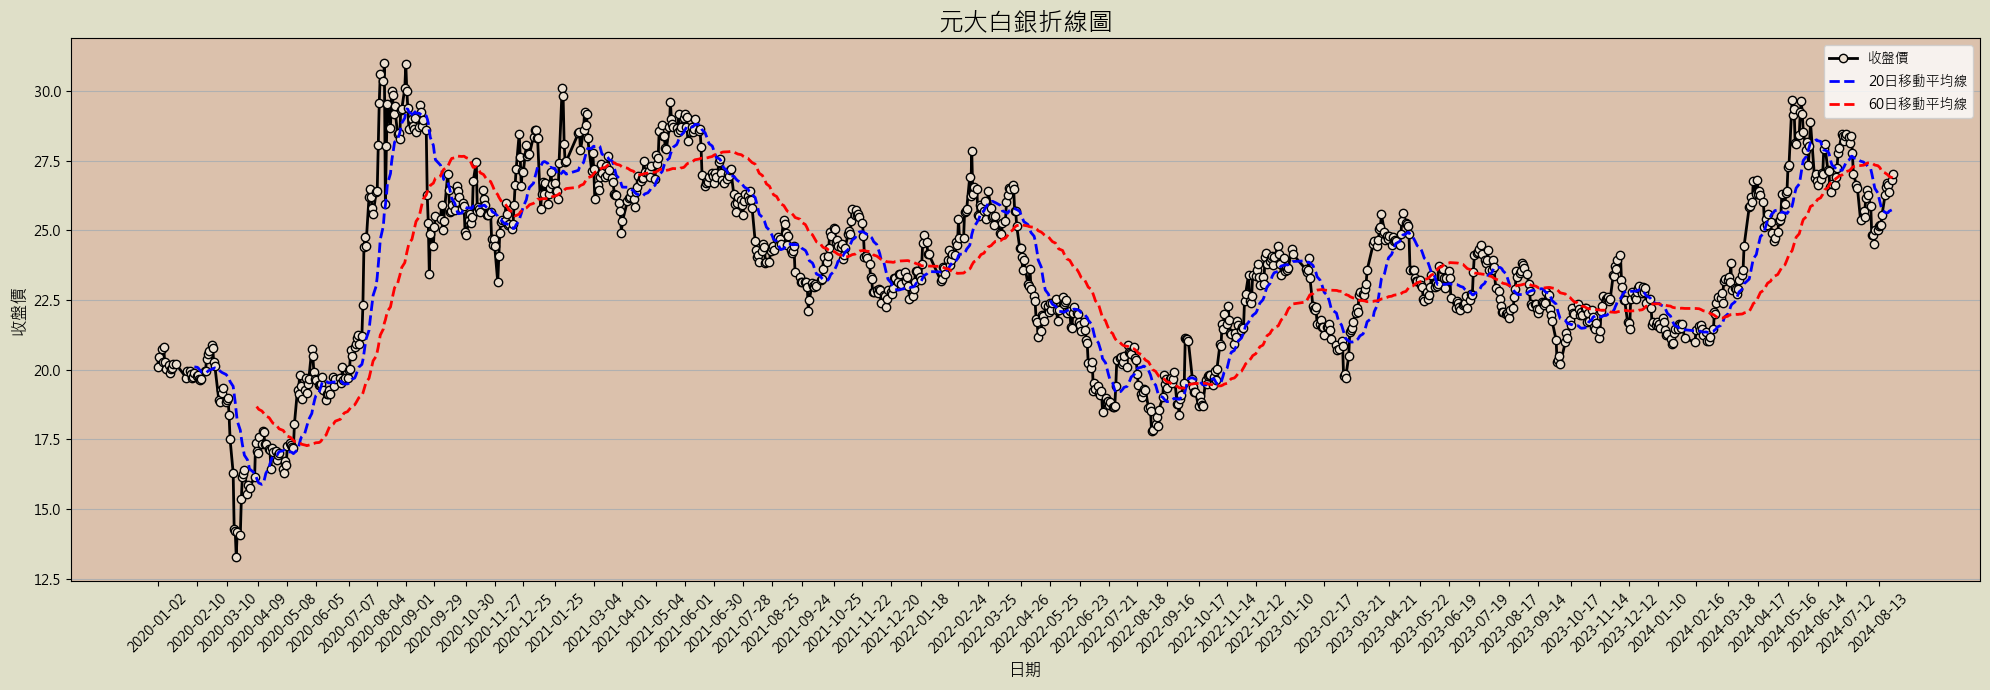

In [1]:
import pandas as pd
import os

# file_path = f'.\738\STOCK_DAY_00738U_{}{}.csv'
# Define the base path and file pattern
base_path = r'.\738'
file_pattern = 'STOCK_DAY_00738U_{}{}.csv'

# Initialize an empty list to collect DataFrames
df_list = []

# Loop through each year
for year in range(2020, 2025):
    # Loop through each month of the year
    for month in range(1, 13):

        # Create the filename for each month
        filename = file_pattern.format(year, f'{month:02d}')
        file_path = os.path.join(base_path, filename)

        # Check if the file exists
        if os.path.exists(file_path):
            # Read the CSV file
            df = pd.read_csv(file_path, encoding='Big5', header=1, thousands=',')

            # Filter rows and process the DataFrame
            df = df[df['日期'].str.match(r'^\d{3}/\d{2}/\d{2}$')]
            df = df.drop(columns=['Unnamed: 9', '成交金額', '漲跌價差', '成交筆數'])
            df['成交股數'] = df['成交股數'].astype('uint32')

            # Append to the list of DataFrames
            df_list.append(df)
        else:
            print(f"File not found: {file_path}")

# Concatenate all DataFrames
df_all = pd.concat(df_list, ignore_index=True)

# Reset index of the concatenated DataFrame
df = df_all.reset_index(drop=True)
print(df.info())
# 白銀股價  日期	成交股數	開盤價	最高價	最低價	收盤價




import matplotlib.pyplot as plt
plt.rc('font', family='Microsoft JhengHei')

# Convert ROC dates to Gregorian dates
def convert_roc_to_gregorian(roc_date):
    year, month, day = map(int, roc_date.split('/'))
    gregorian_year = year + 1911
    return f'{gregorian_year}-{month:02d}-{day:02d}'
df['日期'] = df['日期'].apply(convert_roc_to_gregorian)
# Convert the '日期' column to datetime objects
df['日期'] = pd.to_datetime(df['日期'], format='%Y-%m-%d')


# Extract Date and Close columns
日期 = df['日期']
收盤價 = df['收盤價']

# Calculate 20-day moving average
df['20MA'] = df['收盤價'].rolling(window=20).mean()
df['60MA'] = df['收盤價'].rolling(window=60).mean()

# Create a figure and axes
_fig = plt.gcf()  #_fig object
_axes = plt.gca()

# Set figure and axes properties matplotlib color:float
_fig.set_facecolor((223/255, 223/255, 200/255))
_fig.set_figheight(7)
_fig.set_figwidth(20)  # Increased figure width
_fig.set_layout_engine(layout='tight')
_axes.set_facecolor('#dbc1ac')

# Plot the data
plt.title("元大白銀折線圖", fontsize=18)
plt.plot(日期, 收盤價, color=('black'), linewidth=2.0, marker='o', markerfacecolor='#ece0d1', label='收盤價')
plt.plot(日期, df['20MA'], color='blue', linestyle='--', linewidth=2.0, label='20日移動平均線')
plt.plot(日期, df['60MA'], color='red', linestyle='--', linewidth=2.0, label='60日移動平均線')

# Set x-ticks and labels
_xticks = df['日期'].iloc[::20]  # Adjust frequency as needed
_labels = _xticks.dt.strftime('%Y-%m-%d')  # Format x-tick labels
plt.xticks(ticks=_xticks, labels=_labels, rotation=45)  # Rotate labels

plt.xlabel("日期", fontsize=12)
plt.ylabel("收盤價", fontsize=12)
plt.grid(visible=True, axis='y', linestyle='-')
plt.legend()  # Add a legend to differentiate lines
plt.tight_layout()  # Adjust layout
plt.show()
# plt.savefig("元大白銀.pdf", dpi=300, bbox_inches="tight")


In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 7)) 物件架構

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


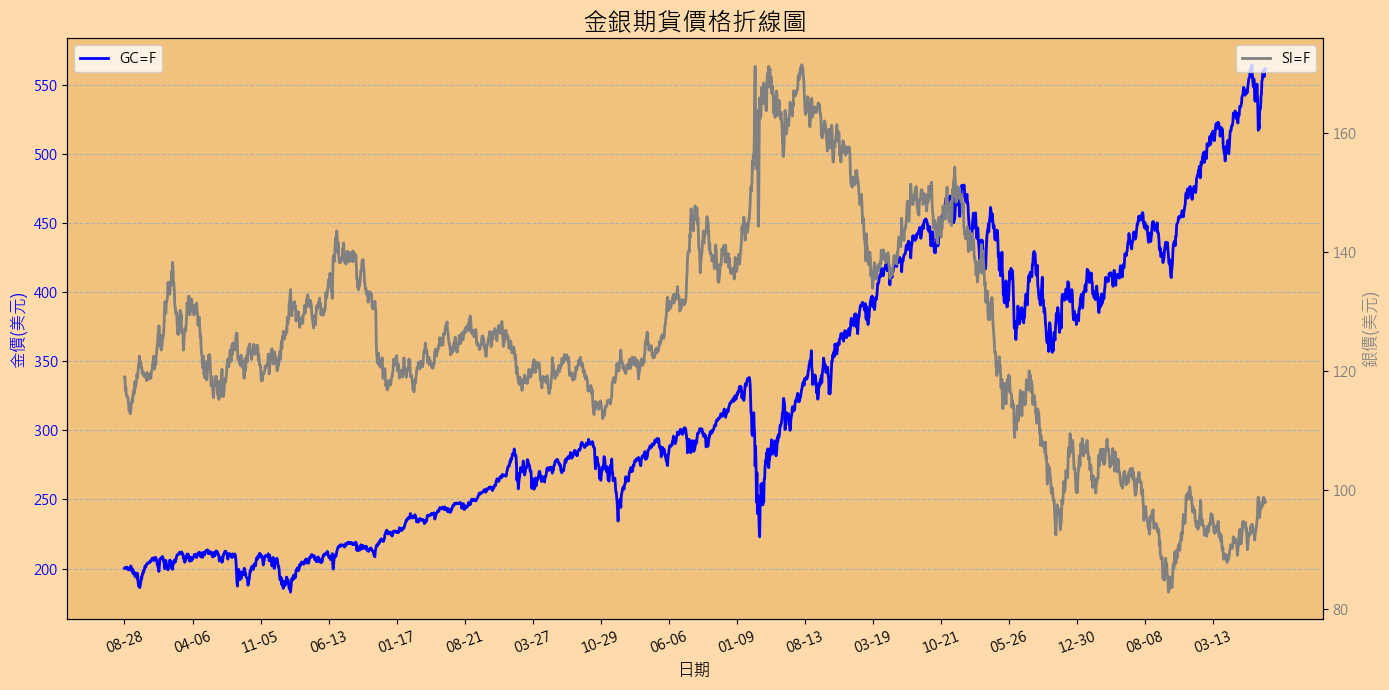

Correlation between S&P 500 and TLT: -0.2769


In [162]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib

# Download data
df_gold = yf.download("SPY", period="10y")
df_silver = yf.download("TLT", period="10y")

# Convert index to string for easier plotting
df_gold.index = df_gold.index.astype(str)
df_silver.index = df_silver.index.astype(str)

# Reset index to use as columns
df_gold = df_gold.reset_index()
df_silver = df_silver.reset_index()

# Extract date and closing price
dates_gold = df_gold['Date']
closing_price_gold = df_gold['Close']
dates_silver = df_silver['Date']
closing_price_silver = df_silver['Close']

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Set background colors
fig.patch.set_facecolor((255/255, 219/255, 172/255))
ax1.set_facecolor((241/255, 194/255, 125/255))

# Plot gold data
ax1.plot(dates_gold, closing_price_gold, color='blue', linewidth=2.0, label='GC=F')
ax1.set_xlabel("日期", fontsize=12)
ax1.set_ylabel("金價(美元)", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis 
ax2 = ax1.twinx() #共用x axis
ax2.plot(dates_silver, closing_price_silver, color='gray', linewidth=2.0, label='SI=F')
ax2.set_ylabel("銀價(美元)", fontsize=12, color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Set x-ticks
_xticks = [n for n in range(0, len(dates_gold), 150)]
_labels = [dates_gold[n][5:] for n in _xticks]
ax1.set_xticks(_xticks)
ax1.set_xticklabels(_labels, rotation=20)

# Add grid, title, and legend
ax1.grid(visible=True, axis='y', linestyle='--')
ax1.set_title("金銀期貨價格折線圖", fontsize=18)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save the plot as a PDF file
plt.tight_layout()
plt.savefig("金銀期貨價格折線圖.pdf", dpi=300, bbox_inches="tight")

# Show plot (optional)
plt.show()


# Merge datasets on date for correlation analysis
df_combined = pd.merge(df_gold[['Date', 'Close']], df_silver[['Date', 'Close']], 
                       on='Date', suffixes=('_gold', '_silver'))

# Calculate correlation
correlation = df_combined['Close_gold'].corr(df_combined['Close_silver'])
print(f"Correlation between S&P 500 and TLT: {correlation:.4f}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Correlation between S&P 500 and TLT: -0.6372

Annualized Volatility of S&P 500: 0.2122
Annualized Volatility of TLT: 0.1794
Sharpe Ratio of S&P 500: 0.0464
Sharpe Ratio of TLT: -0.0233


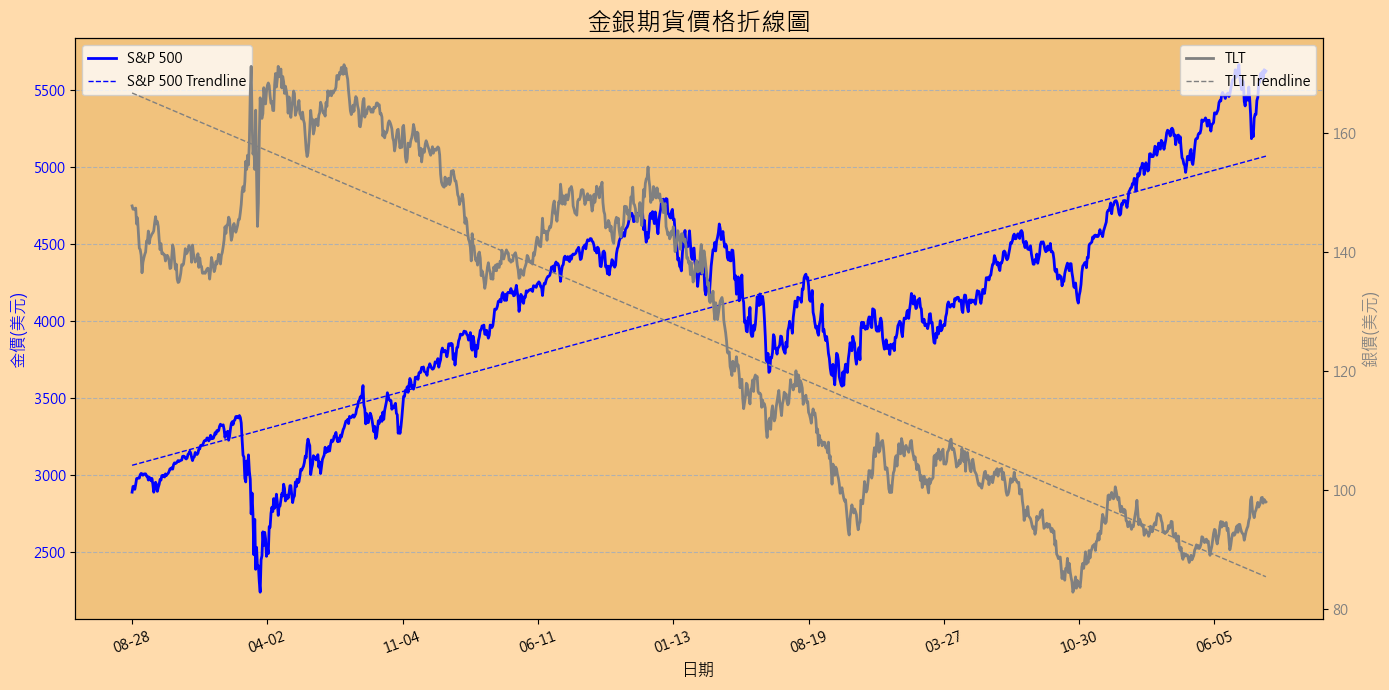

In [165]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Download data
df_gold = yf.download("^GSPC", period="5y")  # S&P 500 as a proxy for gold
df_silver = yf.download("TLT", period="5y")  # TLT as a proxy for silver

# Convert index to string for easier plotting
df_gold.index = df_gold.index.astype(str)
df_silver.index = df_silver.index.astype(str)

# Reset index to use as columns
df_gold = df_gold.reset_index()
df_silver = df_silver.reset_index()

# Extract date and closing price
dates_gold = df_gold['Date']
closing_price_gold = df_gold['Close']
dates_silver = df_silver['Date']
closing_price_silver = df_silver['Close']

# Merge datasets on date for correlation analysis
df_combined = pd.merge(df_gold[['Date', 'Close']], df_silver[['Date', 'Close']], 
                       on='Date', suffixes=('_gold', '_silver'))

# Calculate correlation
correlation = df_combined['Close_gold'].corr(df_combined['Close_silver'])
print(f"Correlation between S&P 500 and TLT: {correlation:.4f}")

# Calculate daily returns
df_combined['Return_gold'] = df_combined['Close_gold'].pct_change()
df_combined['Return_silver'] = df_combined['Close_silver'].pct_change()

# Volatility (annualized)
annualized_volatility_gold = df_combined['Return_gold'].std() * np.sqrt(252)
annualized_volatility_silver = df_combined['Return_silver'].std() * np.sqrt(252)
print(f"\nAnnualized Volatility of S&P 500: {annualized_volatility_gold:.4f}")
print(f"Annualized Volatility of TLT: {annualized_volatility_silver:.4f}")

# Sharpe Ratio (assuming a risk-free rate of 0%)
sharpe_ratio_gold = df_combined['Return_gold'].mean() / df_combined['Return_gold'].std()
sharpe_ratio_silver = df_combined['Return_silver'].mean() / df_combined['Return_silver'].std()
print(f"Sharpe Ratio of S&P 500: {sharpe_ratio_gold:.4f}")
print(f"Sharpe Ratio of TLT: {sharpe_ratio_silver:.4f}")

# Linear regression trendline
from sklearn.linear_model import LinearRegression

# Prepare data for linear regression
X_gold = np.arange(len(df_combined)).reshape(-1, 1)  # Time variable
y_gold = df_combined['Close_gold'].values
model_gold = LinearRegression().fit(X_gold, y_gold)
trendline_gold = model_gold.predict(X_gold)

X_silver = np.arange(len(df_combined)).reshape(-1, 1)
y_silver = df_combined['Close_silver'].values
model_silver = LinearRegression().fit(X_silver, y_silver)
trendline_silver = model_silver.predict(X_silver)

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Set background colors
fig.patch.set_facecolor((255/255, 219/255, 172/255))
ax1.set_facecolor((241/255, 194/255, 125/255))

# Plot gold data
ax1.plot(dates_gold, closing_price_gold, color='blue', linewidth=2.0, label='S&P 500')
ax1.plot(dates_gold, trendline_gold, color='blue', linestyle='--', linewidth=1.0, label='S&P 500 Trendline')
ax1.set_xlabel("日期", fontsize=12)
ax1.set_ylabel("金價(美元)", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis
ax2 = ax1.twinx()  # Share x axis
ax2.plot(dates_silver, closing_price_silver, color='gray', linewidth=2.0, label='TLT')
ax2.plot(dates_silver, trendline_silver, color='gray', linestyle='--', linewidth=1.0, label='TLT Trendline')
ax2.set_ylabel("銀價(美元)", fontsize=12, color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Set x-ticks
_xticks = [n for n in range(0, len(dates_gold), 150)]
_labels = [dates_gold[n][5:] for n in _xticks]
ax1.set_xticks(_xticks)
ax1.set_xticklabels(_labels, rotation=20)

# Add grid, title, and legend
ax1.grid(visible=True, axis='y', linestyle='--')
ax1.set_title("金銀期貨價格折線圖", fontsize=18)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save the plot as a PDF file
plt.tight_layout()
plt.savefig("金銀期貨價格折線圖.pdf", dpi=300, bbox_inches="tight")

# Show plot (optional)
plt.show()
